<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Preprocessing/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Format the csv file into correct format**

In [ ]:
data = pd.read_csv('RawDataset.csv')
data

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [ ]:
# Split columns
data = pd.read_csv('RawDataset.csv', delimiter=';')
data.to_csv('CleanedDataset.csv', index=False)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Data analysis**

## **Column explenations**

In [ ]:
# Function to explain a column
def columnExp(name, data):
  data = data[name]
  dataType = data.dtype
  explanation = f"Column Name: {name}\n"
  explanation += f"Data Type: {dataType}\n"

  if dataType in ['int64', 'float64']:
    explanation += "- Contains numerical data.\n"
    explanation += f"- Unique Values Count: {data.nunique()}\n"
  elif dataType in ['object', 'category']:
    explanation += f"- Contains categorical data.\n"
    explanation += f"- Unique Categories: {data.nunique()}\n"
    categories = data.unique()
    explanation += f"- Categories: {', '.join(map(str, categories))}"
    if len(categories) > 10:
      explanation += f", and {len(categories) - 10} more...\n"
    else:
      explanation += "\n"
  else:
      explanation += "- Contains data of an unhandled type.\n"
  # Null values
  nullCount = data.isnull().sum()
  if nullCount > 0:
    explanation += f"- Missing Values: {nullCount} ({(nullCount / len(data) * 100):.2f}%)\n"
  else:
    explanation += "- No missing values.\n"
  explanation += "-" * 40
  return explanation

In [ ]:
explanations = "\n".join([columnExp(col, data) for col in data.columns])
print(explanations)

Column Name: age
Data Type: int64
- Contains numerical data.
- Unique Values Count: 78
- No missing values.
----------------------------------------
Column Name: job
Data Type: object
- Contains categorical data.
- Unique Categories: 12
- Categories: housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student, and 2 more...
- No missing values.
----------------------------------------
Column Name: marital
Data Type: object
- Contains categorical data.
- Unique Categories: 4
- Categories: married, single, divorced, unknown
- No missing values.
----------------------------------------
Column Name: education
Data Type: object
- Contains categorical data.
- Unique Categories: 8
- Categories: basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate
- No missing values.
----------------------------------------
Column Name: default
Data Type: object
- Contains categorical dat

## **Statictical Summery**

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# **Data Visualisation**

## **Data distribution**

### **Categorical columns**

In [ ]:
catCols = data.select_dtypes(include=['object', 'category']).columns
catCols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

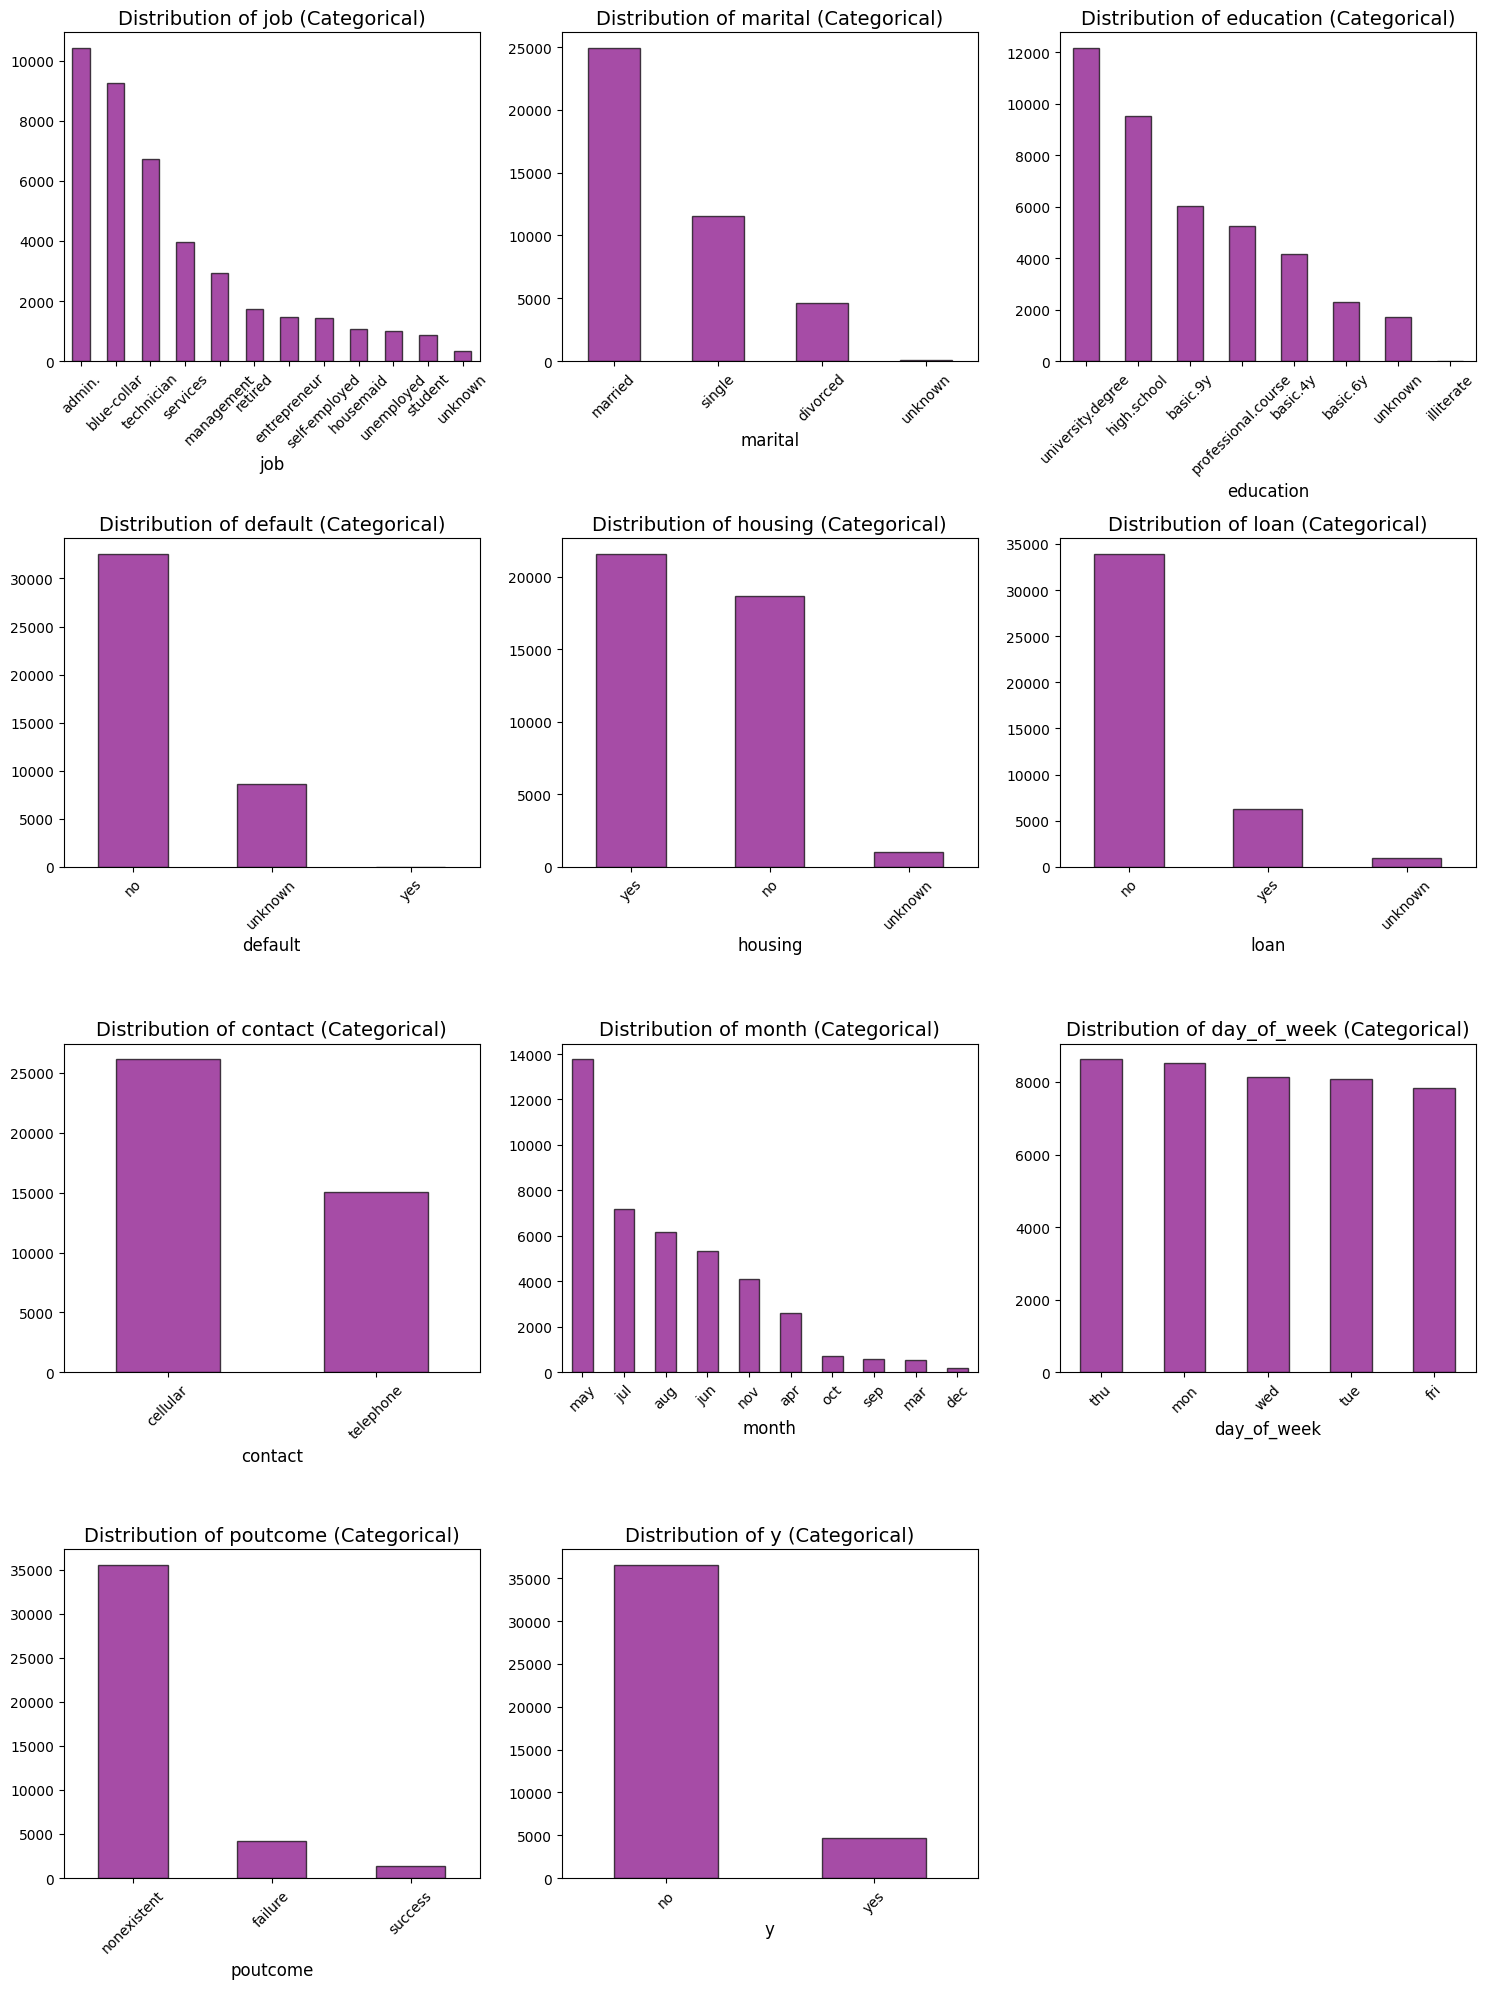

In [ ]:
# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 4 * 5))
axes = axes.flatten()

for i, column in enumerate(catCols):
  data[column].value_counts().plot.bar(color='purple', edgecolor='black', alpha=0.7, ax=axes[i])
  axes[i].set_title(f'Distribution of {column} (Categorical)', fontsize=14)
  axes[i].set_xlabel(column, fontsize=12)
  axes[i].tick_params(axis='x', rotation=45)

for ax in axes[len(catCols):]:
  ax.axis('off')
plt.tight_layout()
plt.show()

### **Numerical columns**

In [ ]:
numCols = data.select_dtypes(include=['int64', 'float64']).columns
numCols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

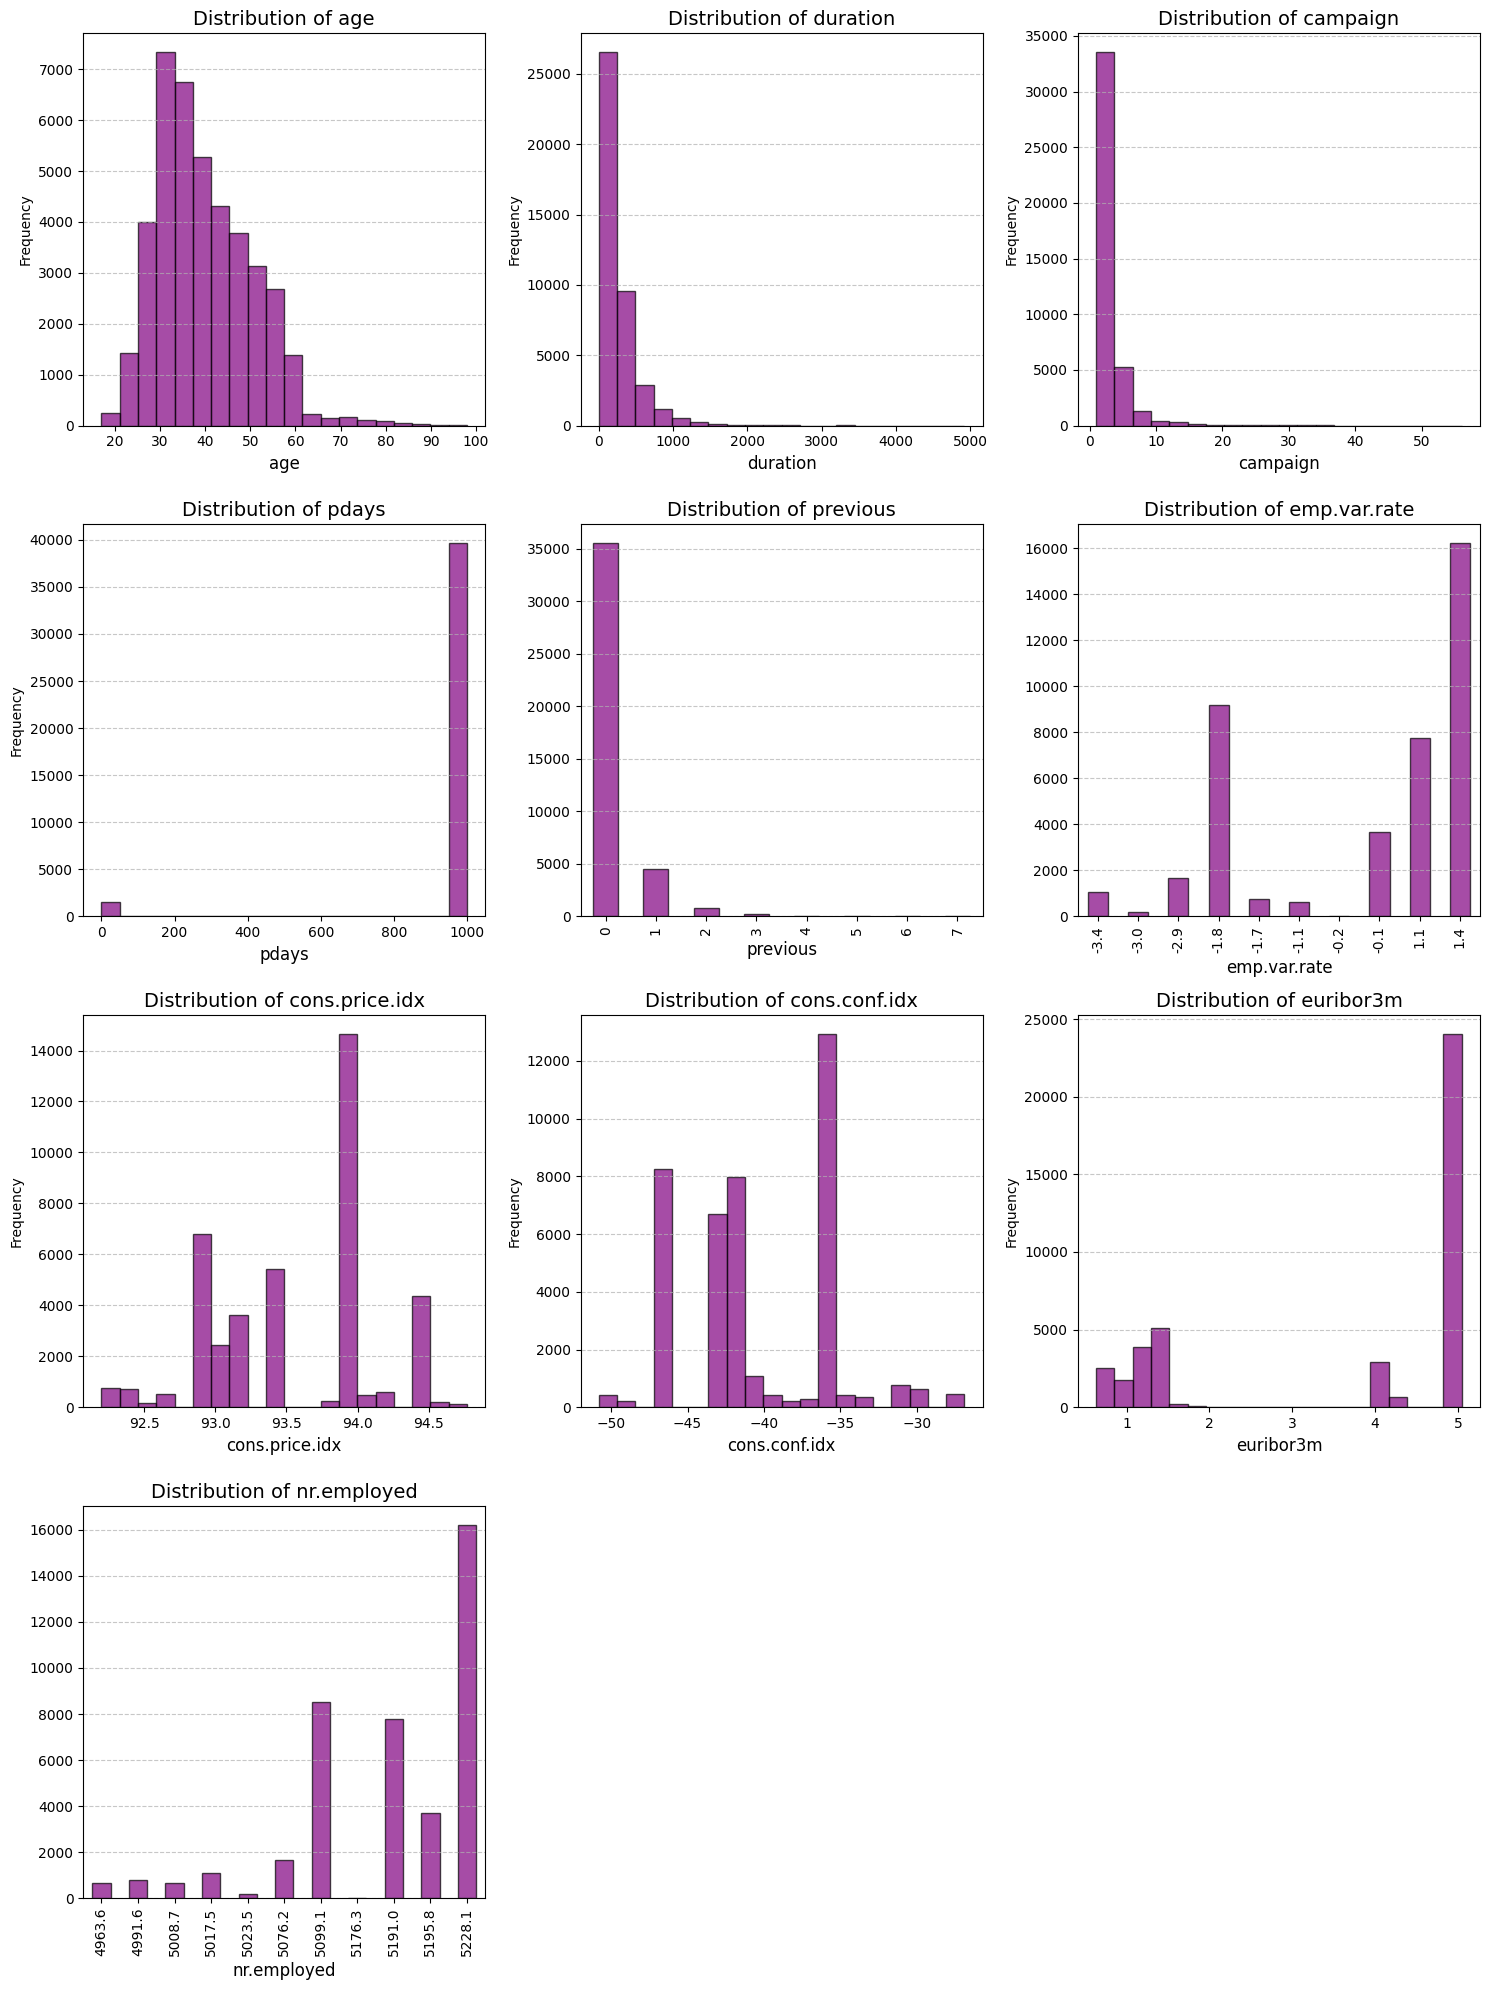

In [ ]:
# Plot structure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, (len(numCols) + 1) // 2 * 4))
axes = axes.flatten()

for i, col in enumerate(numCols):
  # If there are too many unique values, use binning
  if data[col].nunique() > 20:
    data[col].plot(kind='hist', bins=20, color='purple', edgecolor='black', alpha=0.7, ax=axes[i])
  else:
    data[col].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7, ax=axes[i])
  axes[i].set_title(f"Distribution of {col}", fontsize=14)
  axes[i].set_xlabel(col, fontsize=12)
  axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for ax in axes[len(numCols):]:
  ax.axis('off')
plt.tight_layout()
plt.show()

## **Data distribution respect to y**

### **Categorical columns**

In [ ]:
catCols = catCols.drop("y")
catCols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

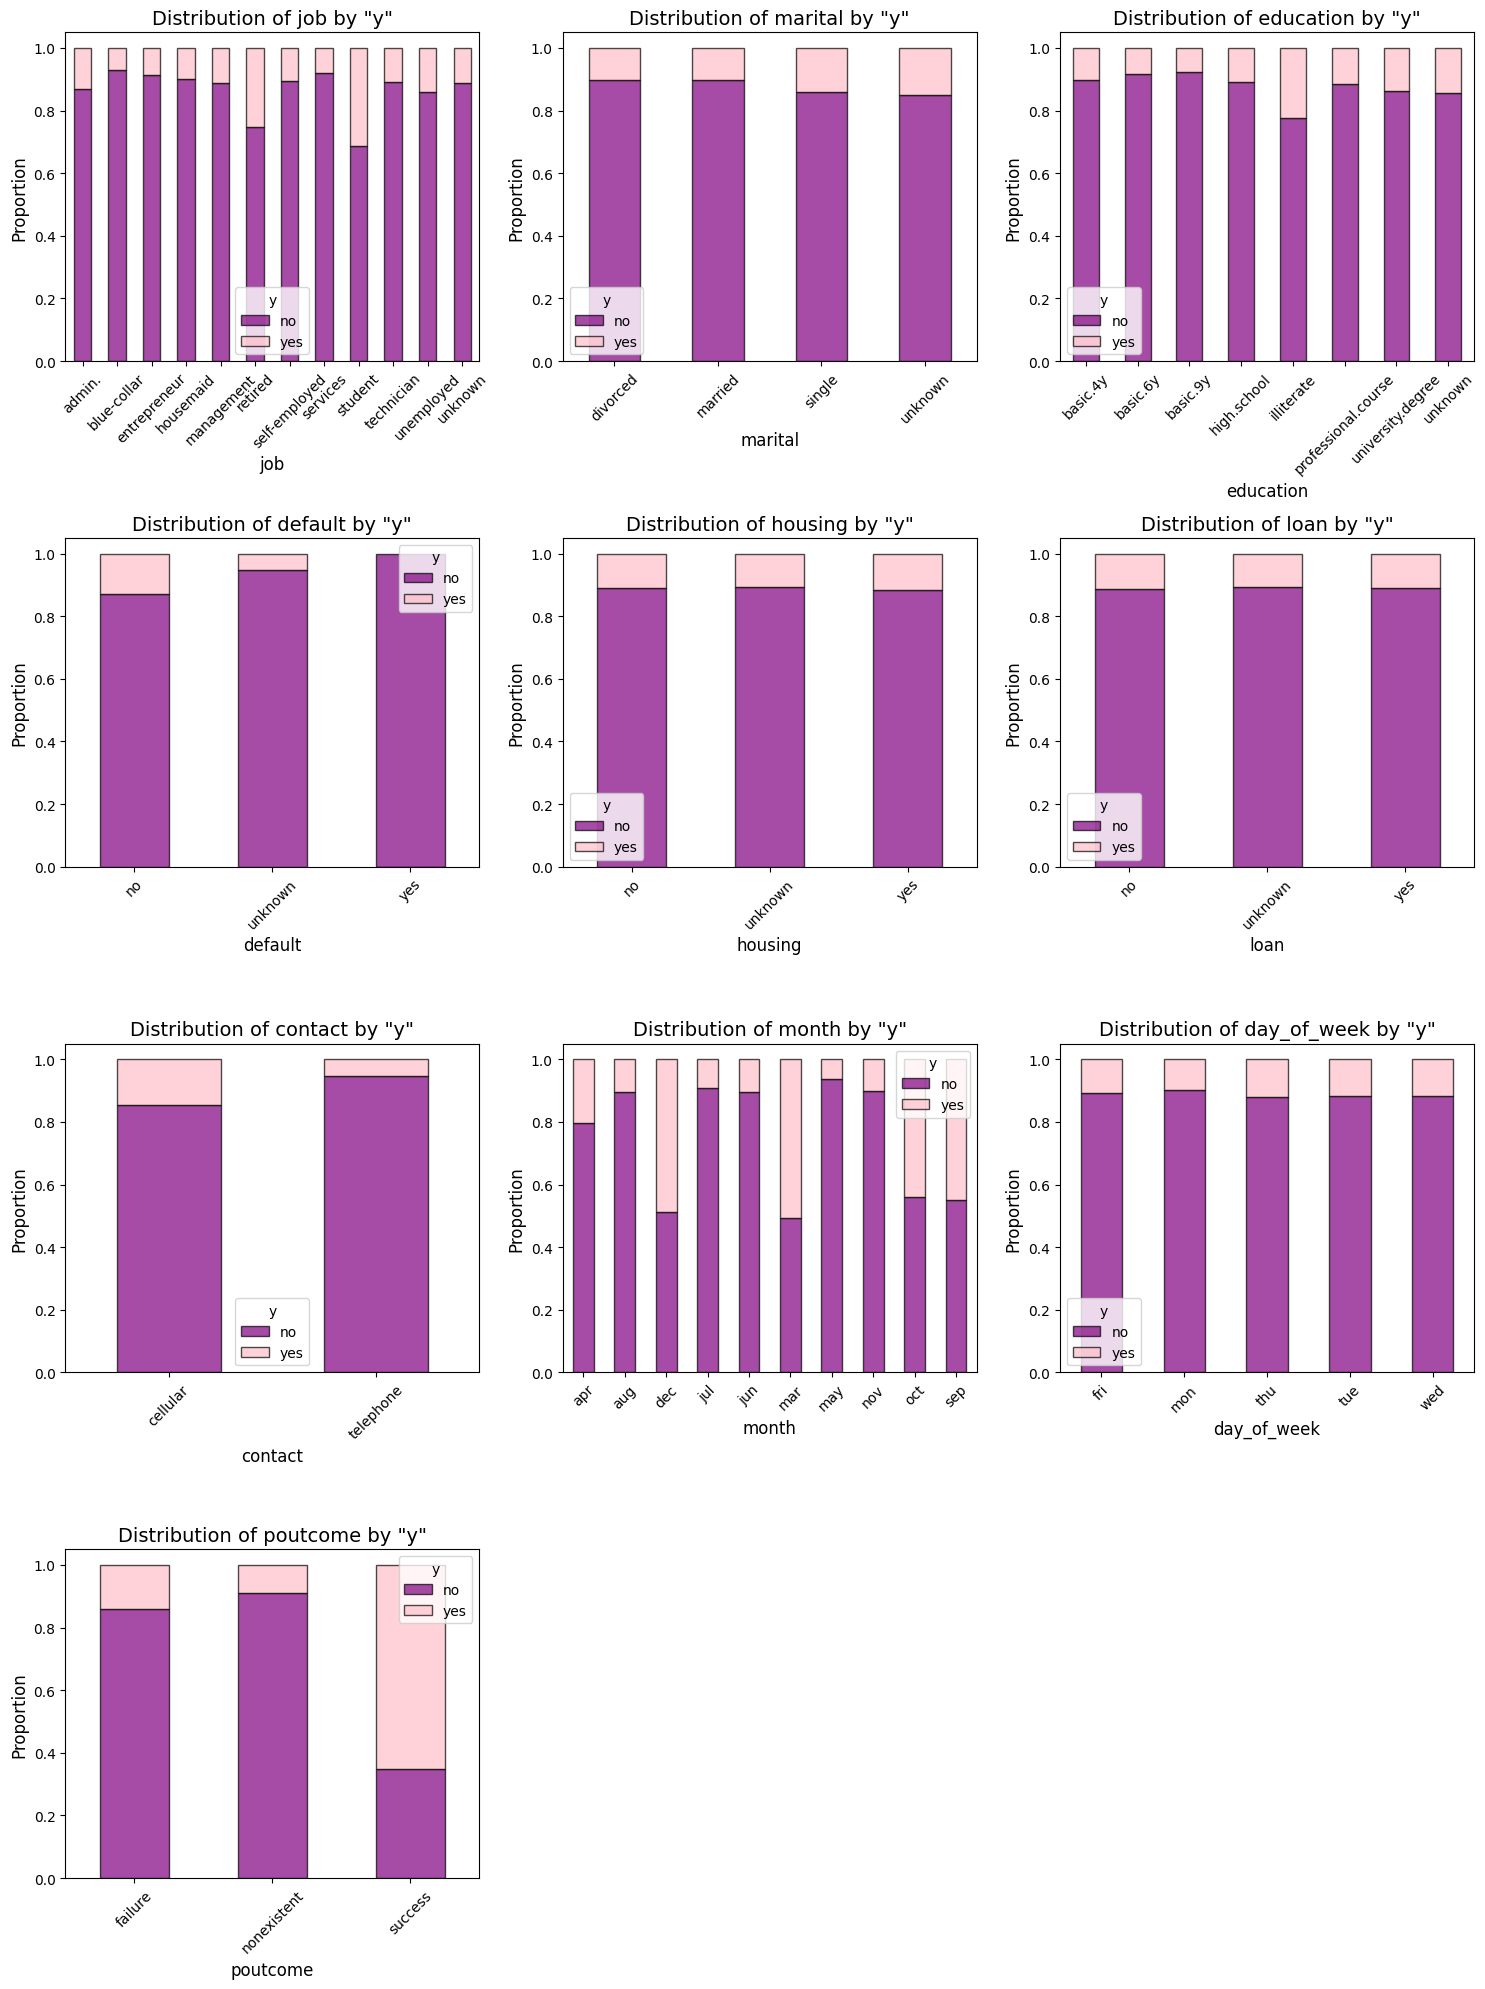

In [ ]:
# Subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 4 * 5))
axes = axes.flatten()

for i, column in enumerate(catCols):
  crossTab = pd.crosstab(data[column], data["y"], normalize='index')
  crossTab.plot(kind='bar', stacked=True, color=['purple', 'pink'], edgecolor='black', alpha=0.7, ax=axes[i])
  axes[i].set_title(f'Distribution of {column} by "y"', fontsize=14)
  axes[i].set_xlabel(column, fontsize=12)
  axes[i].set_ylabel('Proportion', fontsize=12)
  axes[i].tick_params(axis='x', rotation=45)

for i in range(len(numCols), len(axes)):
  axes[i].axis('off')
plt.tight_layout()
plt.show()

### **Numeric columns**

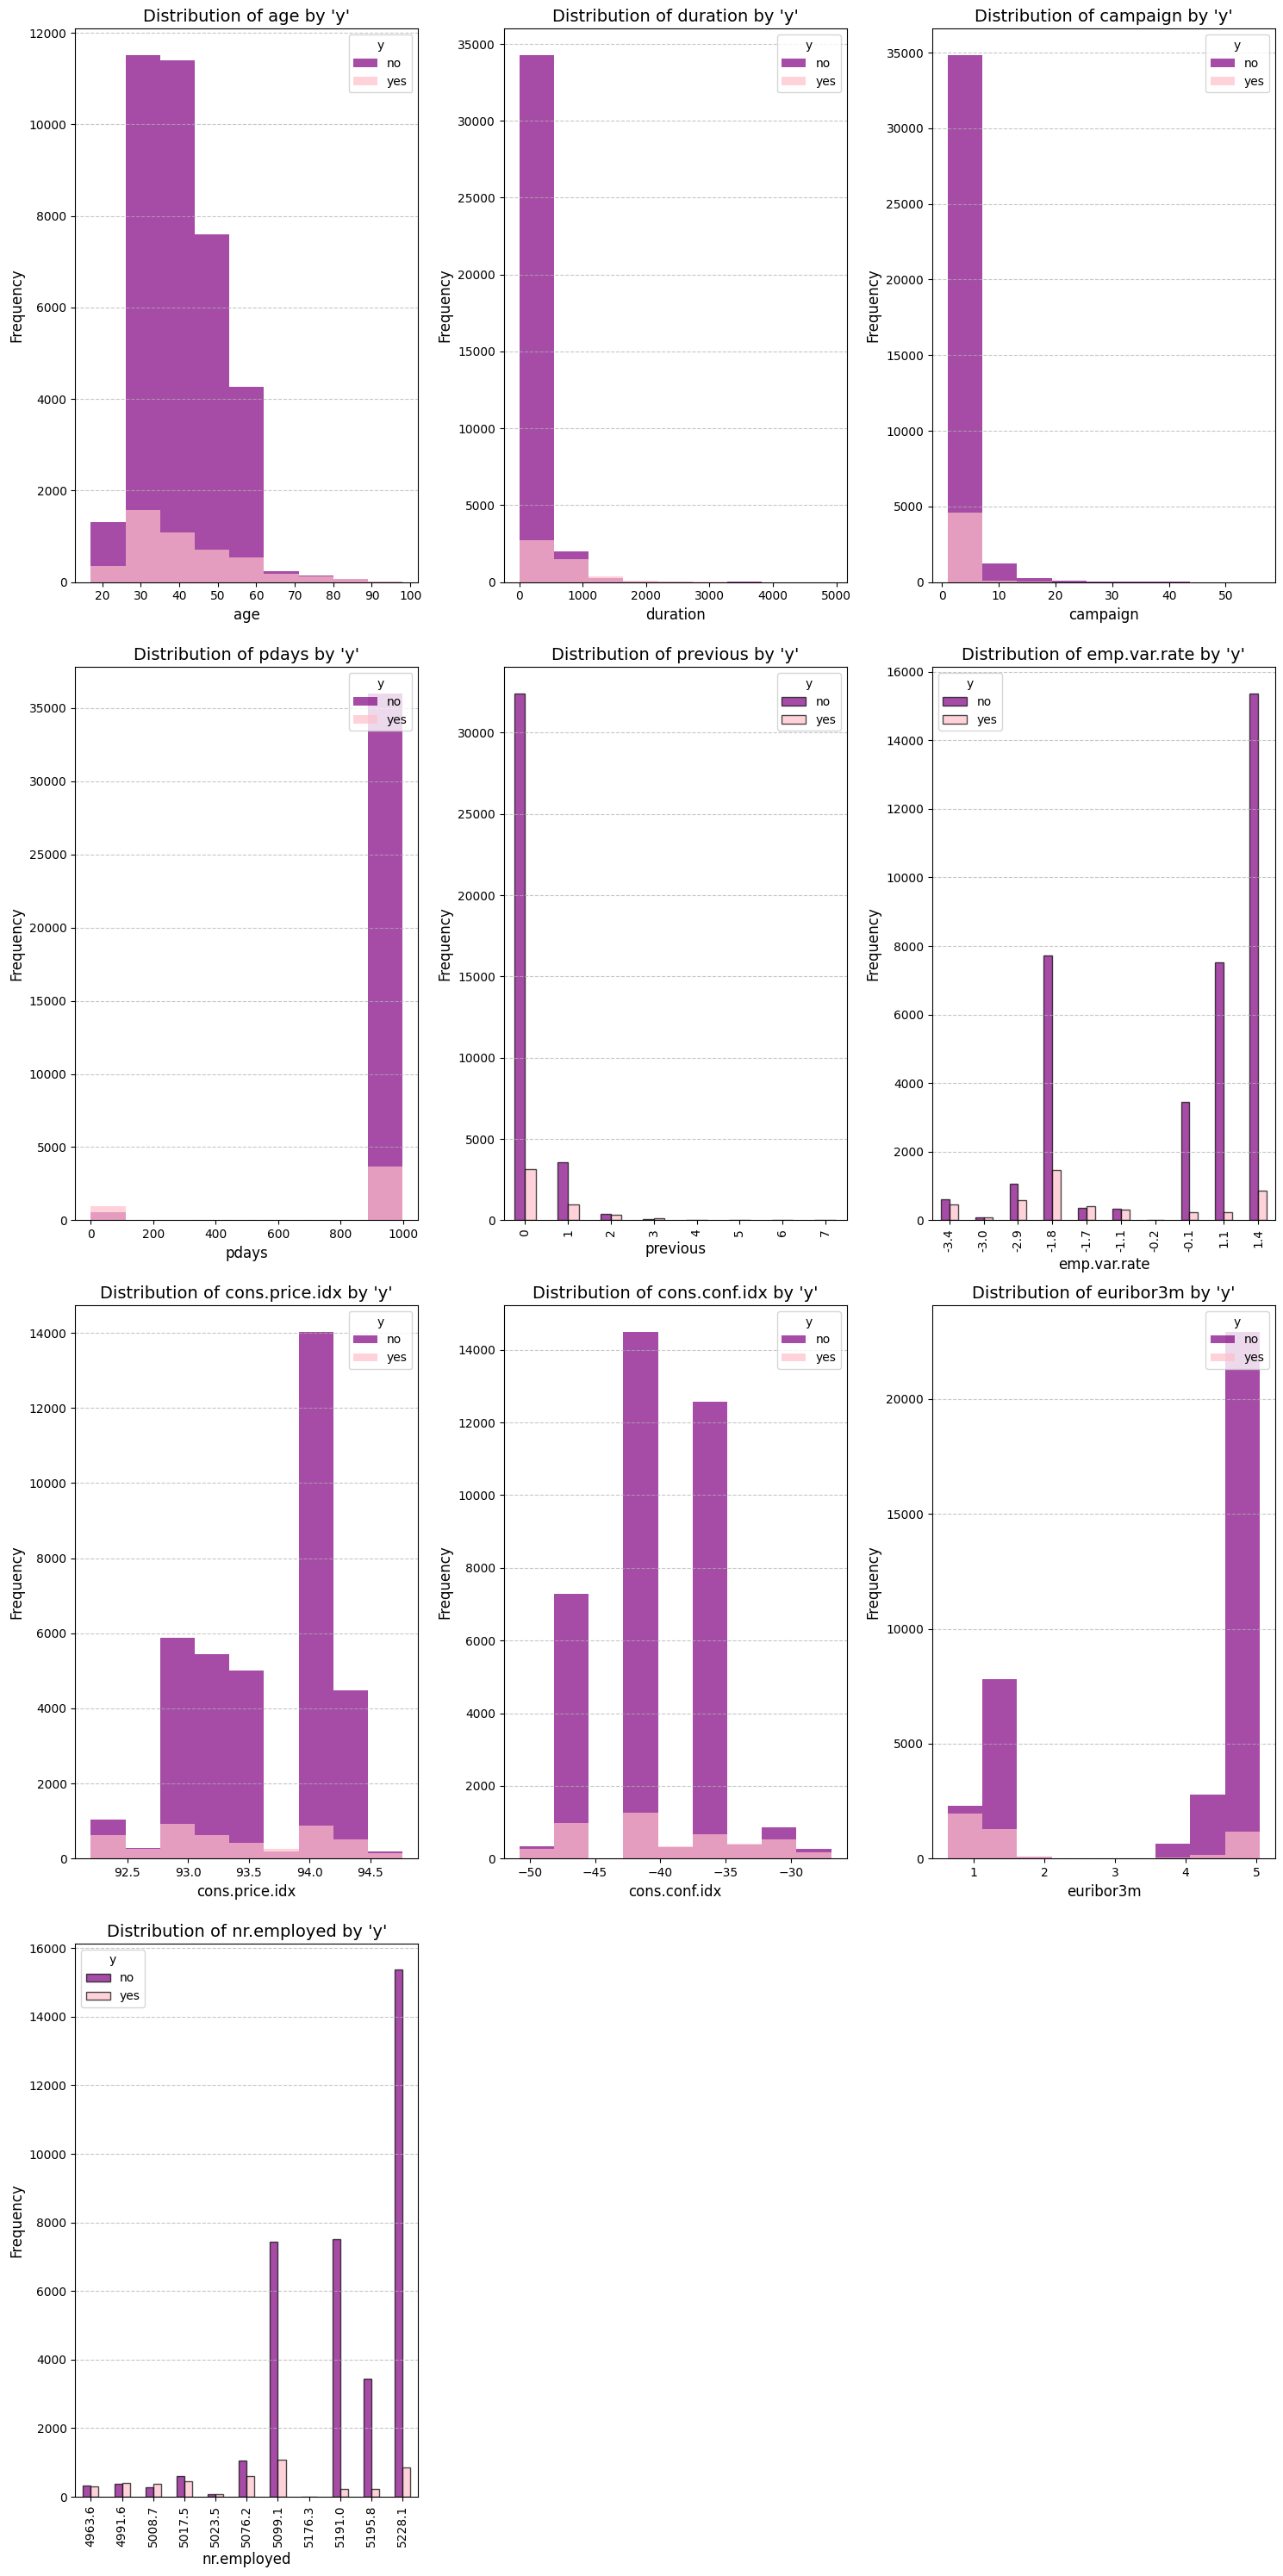

In [ ]:
# Plot structure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(numCols):
  ax = axes[i]
  # Check if the column has many unique values (for binning)
  if data[col].nunique() > 20:
    bins = np.linspace(data[col].min(), data[col].max(), 10)
    colors = {'no': 'purple', 'yes': 'pink'}
    for label in data['y'].unique():
      subset = data[data['y'] == label]
      ax.hist(subset[col], bins=bins, color=colors.get(label, 'blue'), alpha=0.7, label=f'{label}')
    ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend(title='y', loc='upper right')
  else:
    grouped = data.groupby([col, 'y']).size().unstack(fill_value=0)
    grouped.plot(kind='bar', stacked=False, ax=ax, color=['purple', 'pink'], edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
  ax.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(numCols), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# **Handle null/missing values**

In [ ]:
data = pd.read_csv('CleanedDataset.csv')

print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# **Handle duplicates**

## **Check for duplicate rows**

In [ ]:
data = pd.read_csv('CleanedDataset.csv')
dupRows = data[data.duplicated()]

In [ ]:
print("Number of duplicate rows:", dupRows.shape[0])

Number of duplicate rows: 12


In [ ]:
print(dupRows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

## **Remove duplicate rows**

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()
print("Duplicate rows removed.")

Duplicate rows removed.


In [ ]:
data.to_csv("CleanedDataset.csv", index=False)
print("Updated dataset saved to CleanedDataset.csv.")

Updated dataset saved to CleanedDataset.csv.


# **Check correlations**

## **Inercorrelations**

In [ ]:
data = pd.read_csv('CleanedDataset.csv')
numCols = data.select_dtypes(include=['int64', 'float64'])
numCols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
cm = numCols.corr()

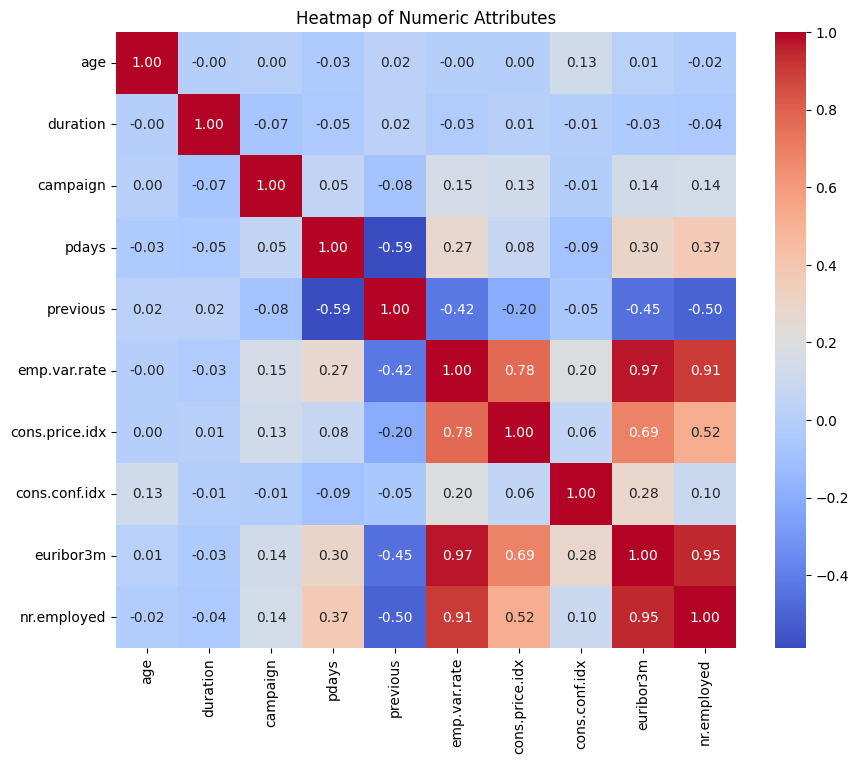

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

## **Correlations with y**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
target = 'y'
data['y'] = le.fit_transform(data[target])
numeric_columns = data.select_dtypes(include=['number']).columns
corrWithY = data[numeric_columns].corr()[target].drop(target).sort_values(key=abs, ascending=False)

<ipython-input-589-b9aab2ecb6f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrWithY.values, y=corrWithY.index, palette="coolwarm")


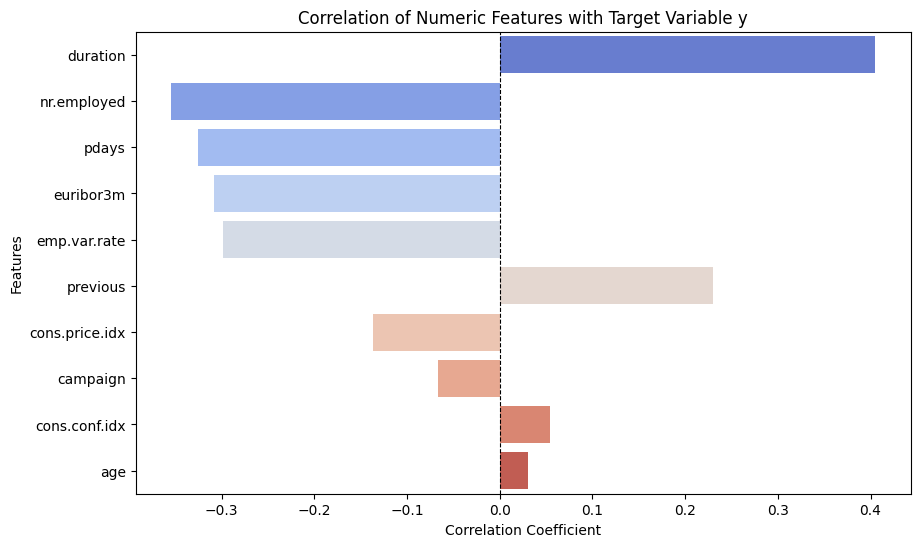

In [ ]:
# Visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corrWithY.values, y=corrWithY.index, palette="coolwarm")
plt.title("Correlation of Numeric Features with Target Variable y")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
plt.show()

# **Dimentional Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Columns for PCA
cols = ['euribor3m', 'nr.employed', 'emp.var.rate', 'cons.price.idx']
pcaData = data[cols]

In [ ]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(pcaData)

In [ ]:
# Apply PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaledData)

In [ ]:
pcaColumns = [f"PC{i+1}" for i in range(pca.n_components_)]
pcaDF = pd.DataFrame(data=principalComponents, columns=pcaColumns)
data = data.drop(columns=cols)
data = pd.concat([data, pcaDF], axis=1)
data.to_csv("pca.csv", index=False)
print("Updated dataset with PCA saved to pca.csv")

Updated dataset with PCA saved to pca.csv


In [ ]:
data = pd.read_csv('pca.csv')
numCols = data.select_dtypes(include=['int64', 'float64'])

In [ ]:
cm = numCols.corr()

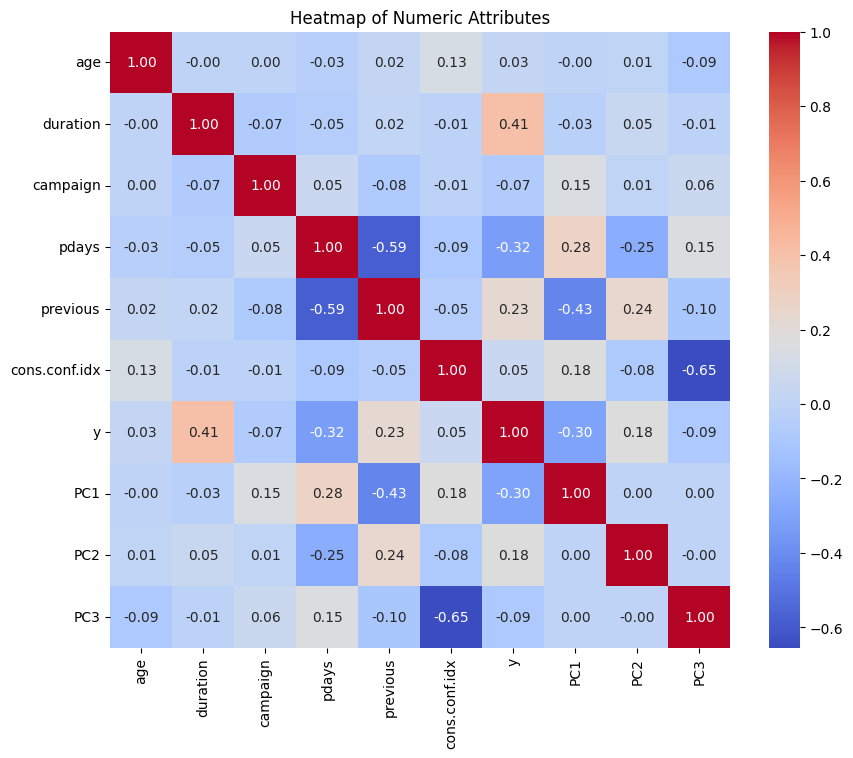

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

# **Feature importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('pca.csv')

# Do a label encoding to train a random forest
encoders = {}
encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  encoded[col] = le.fit_transform(data[col])
  encoders[col] = le

In [ ]:
X = encoded.drop(columns=['y'])
y = encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a simple model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importances = rf.feature_importances_
features = X.columns
# Sort
indices = np.argsort(importances)[::-1]
sortedFeatures = features[indices]
sortedImportance = importances[indices]

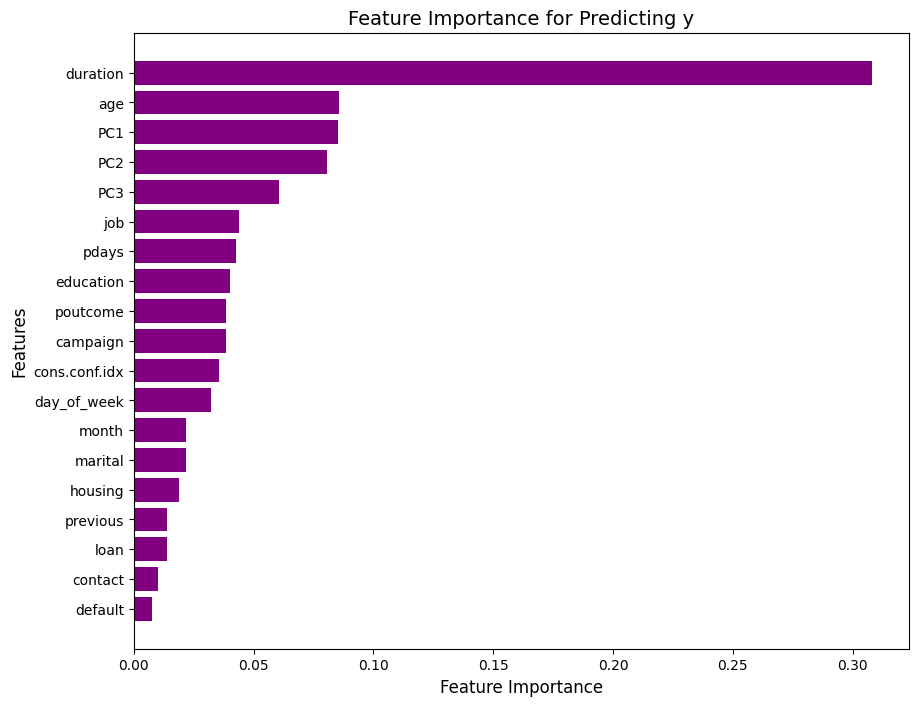

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(sortedFeatures, sortedImportance, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Feature Selection**

In [ ]:
data = pd.read_csv('pca.csv')

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['duration', 'contact', 'default'])
data.to_csv('DatasetDropped.csv', index=False)
print("Unwanted columns were dropped.")

Unwanted columns were dropped.


In [ ]:
data

,age,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y,PC1,PC2,PC3
0,56,housemaid,married,basic.4y,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
1,57,services,married,high.school,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
2,37,services,married,high.school,yes,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
3,40,admin.,married,basic.6y,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
4,56,services,married,high.school,no,yes,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,yes,no,nov,fri,1,999,0,nonexistent,-50.8,1,-1.717511,3.449279,-0.33688
41172,46,blue-collar,married,professional.course,no,no,nov,fri,1,999,0,nonexistent,-50.8,0,-1.717511,3.449279,-0.33688
41173,56,retired,married,university.degree,yes,no,nov,fri,2,999,0,nonexistent,-50.8,0,-1.717511,3.449279,-0.33688
41174,44,technician,married,professional.course,no,no,nov,fri,1,999,0,nonexistent,-50.8,1,-1.717511,3.449279,-0.33688


In [ ]:
data = pd.read_csv('DatasetDropped.csv')
# Do a label encoding for train a random forest
encoders = {}
encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  encoded[col] = le.fit_transform(data[col])
  encoders[col] = le

In [ ]:
X = encoded.drop(columns=['y'])
y = encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a simple model for get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importances = rf.feature_importances_
features = X.columns
# Sort
indices = np.argsort(importances)[::-1]
sortedFeatures = features[indices]
sortedImportance = importances[indices]

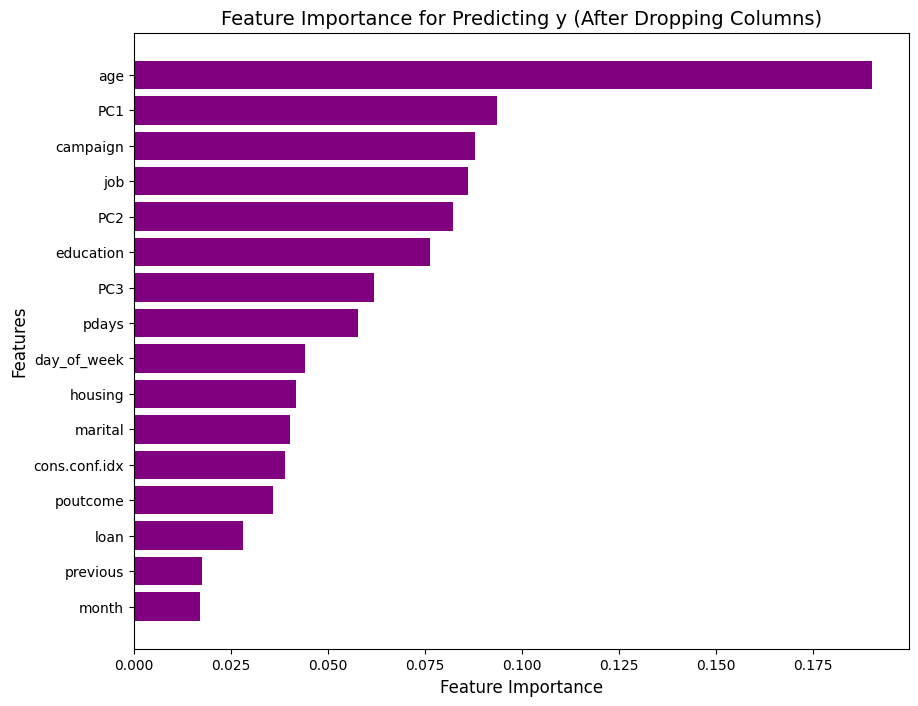

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(sortedFeatures, sortedImportance, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y (After Dropping Columns)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Handle Outliers**

## **Check outliers**

In [ ]:
data = pd.read_csv('DatasetDropped.csv')
numCols = data.select_dtypes(include=['float64', 'int64']).columns
numCols

Index(['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'y', 'PC1',
       'PC2', 'PC3'],
      dtype='object')

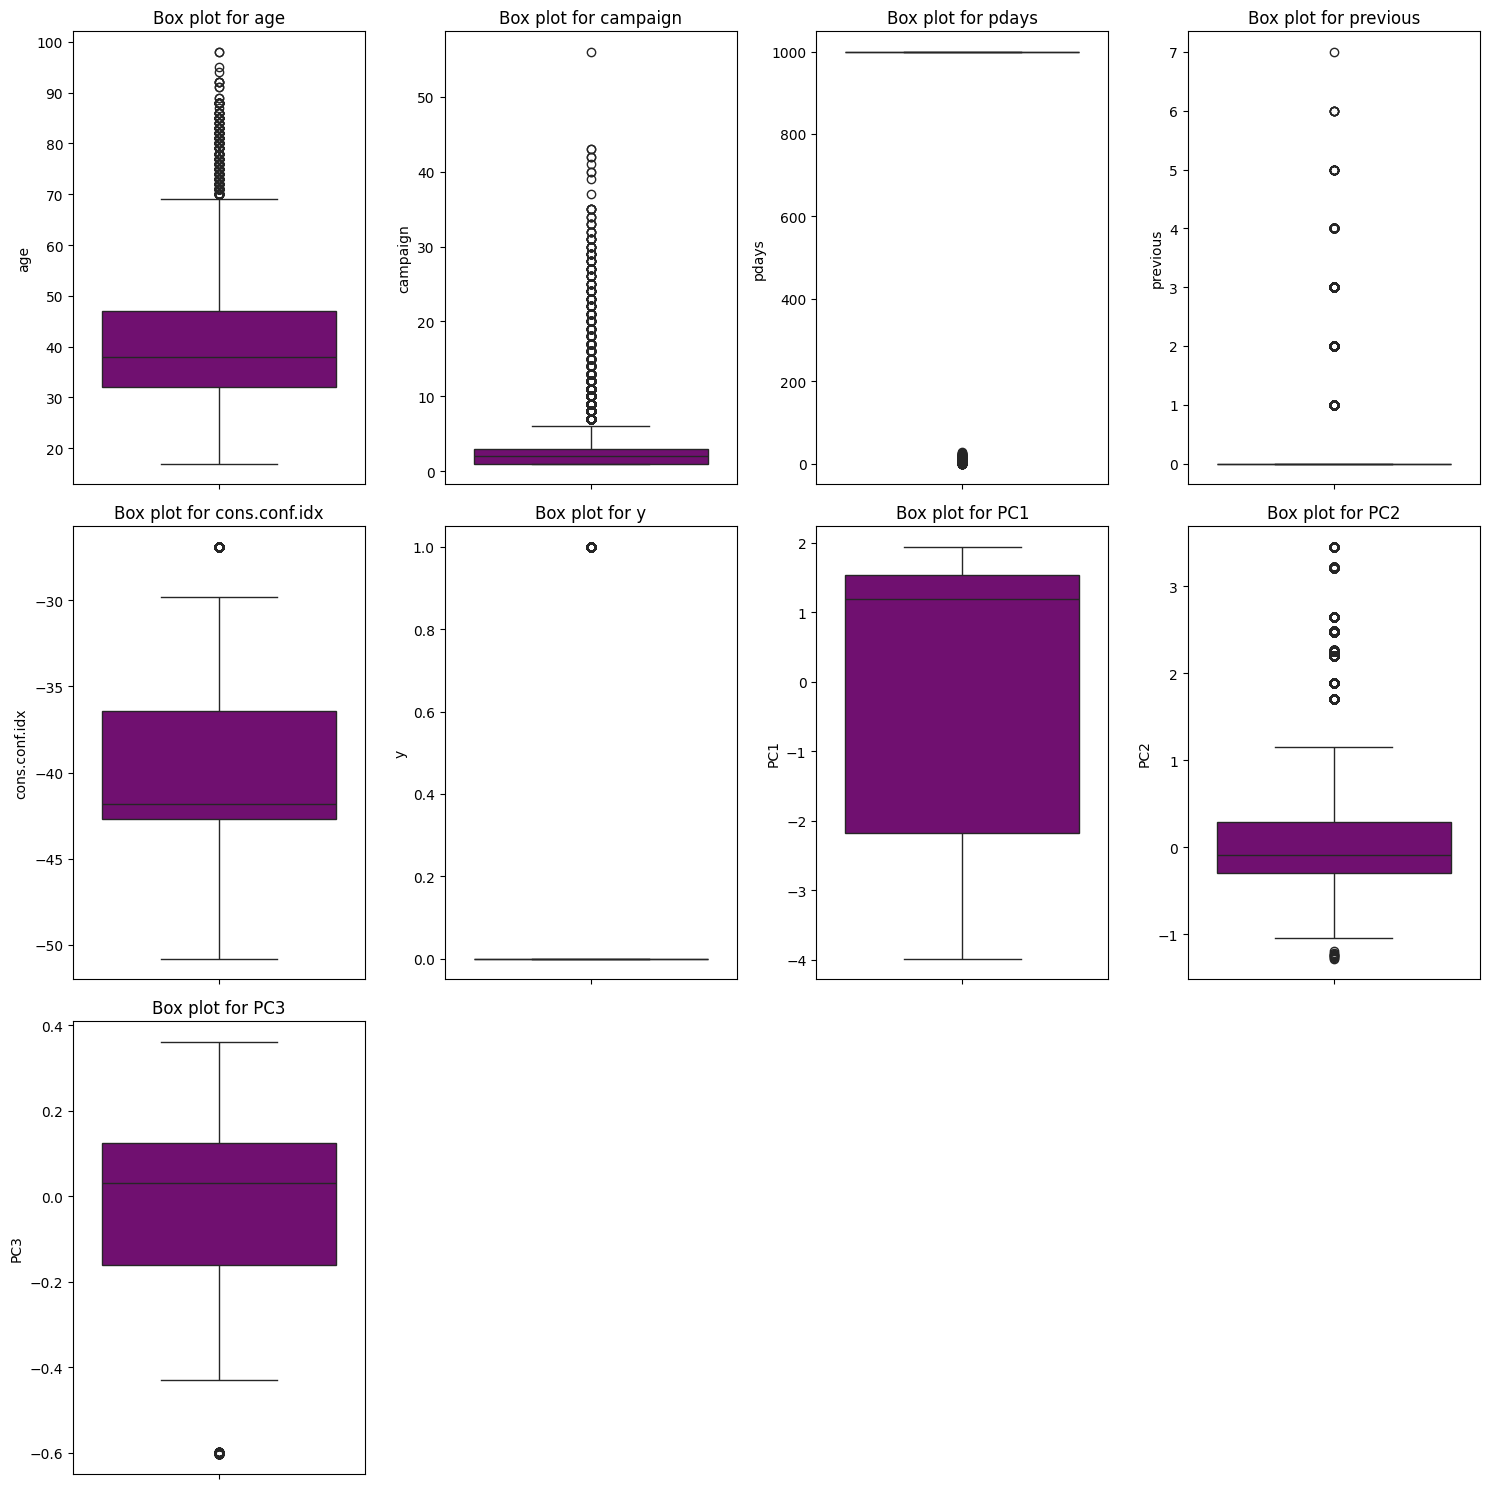

In [ ]:
plt.figure(figsize=(15, 3 * 5))
# Box-plots for each feature
for i, column in enumerate(numCols, 1):
  plt.subplot(3, 4, i)  # Arrange plots in a grid with 4 columns
  sns.boxplot(data=data[column], color='purple')
  plt.title(f"Box plot for {column}")
  plt.tight_layout()
plt.show()

In [ ]:
capCols = ['age', 'campaign', 'cons.conf.idx']

In [ ]:
# Detect outliers with IQR
def detect_outliers(column):
  Qu1 = column.quantile(0.25)
  Qu3 = column.quantile(0.75)
  IQRange = Qu3 - Qu1
  LB = Qu1 - 1.5 * IQRange
  UB = Qu3 + 1.5 * IQRange
  outliers = column[(column < LB) | (column > UB)]
  return LB, UB, outliers

In [ ]:
# Analyze the columns
for column_name in capCols:
  colData = data[column_name]
  LB, UB, outliers = detect_outliers(colData)
  print("Column:", column_name)
  print("Lower Bound:", LB)
  print("Upper Bound:", UB)
  print("Number of Outliers:", len(outliers))
  print("-"*50)

Column: age
Lower Bound: 9.5
Upper Bound: 69.5
Number of Outliers: 468
--------------------------------------------------
Column: campaign
Lower Bound: -2.0
Upper Bound: 6.0
Number of Outliers: 2406
--------------------------------------------------
Column: cons.conf.idx
Lower Bound: -52.150000000000006
Upper Bound: -26.949999999999992
Number of Outliers: 446
--------------------------------------------------


## **Handle outliers with capping**

In [ ]:
# Capping
for col in capCols:
  Qu1 = data[col].quantile(0.25)
  Qu3 = data[col].quantile(0.75)
  IQRange = Qu3 - Qu1
  lowerCap = Qu1 - 1.5 * IQRange
  upperCap = Qu3 + 1.5 * IQRange
  # Apply capping
  data[col] = data[col].clip(lower=lowerCap, upper=upperCap)

data.to_csv("Capped.csv", index=False)
print("Capping applied successfully.")

Capping applied successfully.


## **Visualize capped columns**

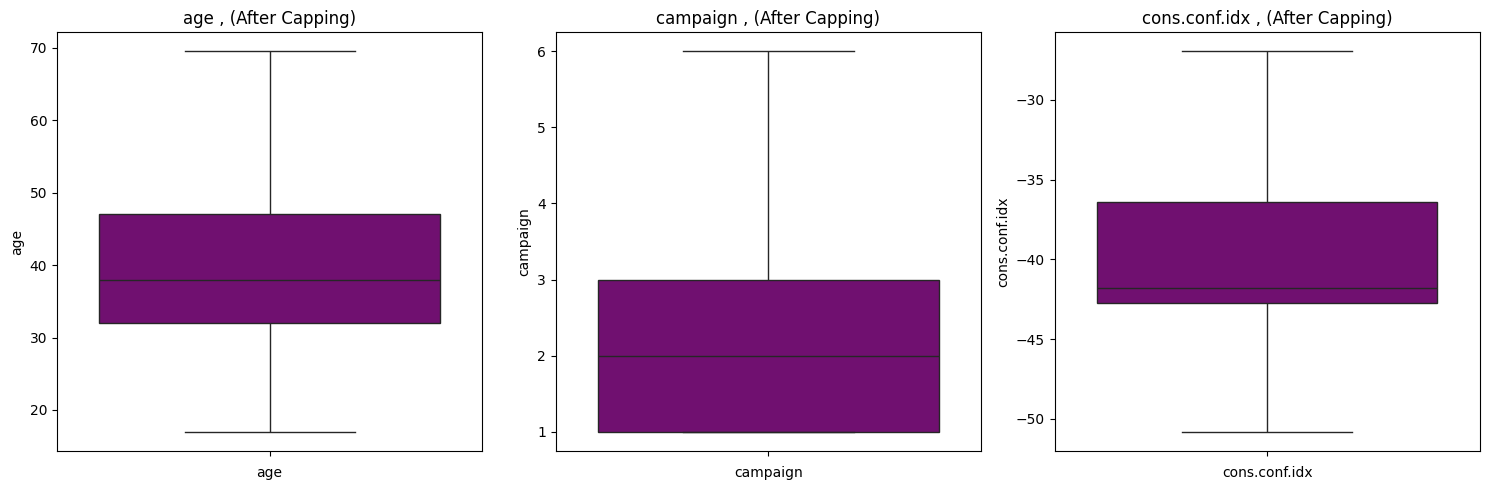

In [ ]:
df = pd.read_csv('Capped.csv')

plt.figure(figsize=(15, 5))
for i, column in enumerate(capCols):
  plt.subplot(1, len(capCols), i + 1)
  sns.boxplot(data=df[column], color='purple')
  plt.title(f'{column} , (After Capping)')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

# **Encodeing**

In [ ]:
data = pd.read_csv('Capped.csv')
data

,age,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y,PC1,PC2,PC3
0,56.0,housemaid,married,basic.4y,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
1,57.0,services,married,high.school,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
2,37.0,services,married,high.school,yes,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
3,40.0,admin.,married,basic.6y,no,no,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
4,56.0,services,married,high.school,no,yes,may,mon,1,999,0,nonexistent,-36.4,0,1.199777,0.293764,-0.16023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,retired,married,professional.course,yes,no,nov,fri,1,999,0,nonexistent,-50.8,1,-1.717511,3.449279,-0.33688
41172,46.0,blue-collar,married,professional.course,no,no,nov,fri,1,999,0,nonexistent,-50.8,0,-1.717511,3.449279,-0.33688
41173,56.0,retired,married,university.degree,yes,no,nov,fri,2,999,0,nonexistent,-50.8,0,-1.717511,3.449279,-0.33688
41174,44.0,technician,married,professional.course,no,no,nov,fri,1,999,0,nonexistent,-50.8,1,-1.717511,3.449279,-0.33688


In [ ]:
catCols = data.select_dtypes(include=['object']).columns
# One-hot encoding
encoded = pd.get_dummies(data, columns=catCols, drop_first=True)
# Replace boolean values with 1 / 0
encoded[encoded.columns[encoded.dtypes == 'bool']] = encoded[encoded.columns[encoded.dtypes == 'bool']].astype(int)

In [ ]:
# Make pdays column as a binary column
encoded['prev_cont'] = encoded['pdays'].replace(999, 0).apply(lambda x: 1 if x != 0 else x)
encoded = encoded.drop(columns=['pdays'])

In [ ]:
# Rename the 'y_yes' column to 'y'
encoded = encoded.rename(columns={'y_yes': 'y'})
# Move the 'y' column to the end
cols = [col for col in encoded if col != 'y'] + ['y']
encoded = encoded[cols]

In [ ]:
encoded.to_csv('Encoded.csv', index=False)
encoded

,age,campaign,previous,cons.conf.idx,PC1,PC2,PC3,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,prev_cont,y
0,56.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,57.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,1,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,1
41172,46.0,1,0,-50.8,-1.717511,3.449279,-0.33688,1,0,0,...,0,0,0,0,0,0,1,0,0,0
41173,56.0,2,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41174,44.0,1,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# **Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("Encoded.csv")
data

,age,campaign,previous,cons.conf.idx,PC1,PC2,PC3,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,prev_cont,y
0,56.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,57.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56.0,1,0,-36.4,1.199777,0.293764,-0.16023,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,1,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,1
41172,46.0,1,0,-50.8,-1.717511,3.449279,-0.33688,1,0,0,...,0,0,0,0,0,0,1,0,0,0
41173,56.0,2,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41174,44.0,1,0,-50.8,-1.717511,3.449279,-0.33688,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Continuous numerical columns
features = ['age', 'campaign', 'previous', 'cons.conf.idx', 'PC1', 'PC2', 'PC3']

In [ ]:
# Create a copy to scale
scaledData = data.copy()

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
scaledData[features] = scaler.fit_transform(data[features])

In [ ]:
print(scaledData.head())
scaledData.to_csv('Scaled.csv', index=False)

        age  campaign  previous  cons.conf.idx       PC1       PC2      PC3  \
0  1.585672 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
1  1.684402 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
2 -0.290190 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
3  0.005999 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
4  1.585672 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_oct  \
0                0                 0              1  ...          0   
1                0                 0              0  ...          0   
2                0                 0              0  ...          0   
3                0                 0              0  ...          0   
4                0                 0              0  ...          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1  

# **Shuffle the dataset**

In [ ]:
data = pd.read_csv("Scaled.csv")
shuffled = data.sample(frac=1).reset_index(drop=True)
shuffled

,age,campaign,previous,cons.conf.idx,PC1,PC2,PC3,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,prev_cont,y
0,1.289483,1.757092,-0.349551,-0.474815,0.828541,-0.122363,0.240828,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-1.474944,-0.177659,-0.349551,-0.474815,0.828541,-0.122363,0.240828,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1.289483,-0.822576,-0.349551,-0.323503,-0.010528,-1.099600,0.163747,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.783837,-0.177659,-0.349551,-1.231373,-1.265239,-0.329363,0.721242,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,-0.191460,-0.177659,1.670821,-0.323503,0.005816,-1.115425,0.030620,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.302188,1.112175,-0.349551,-0.323503,-0.010528,-1.099600,0.163747,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41172,-0.685108,-0.822576,-0.349551,0.951838,0.639159,-1.081560,-1.076378,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41173,-0.388919,-0.822576,-0.349551,-0.474815,0.827881,-0.121724,0.246207,1,0,0,...,0,0,0,1,0,0,1,0,0,0
41174,1.783131,-0.177659,-0.349551,0.886990,0.648558,0.407989,-0.842144,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
shuffled.to_csv("BankDataset.csv", index=False)
print("Dataset shuffled successfully.")

Dataset shuffled successfully.


# **Check class inbalance**

In [ ]:
data = pd.read_csv("BankDataset.csv")
# Counts
counts = data["y"].value_counts()
counts

,count
y,
0,36537
1,4639


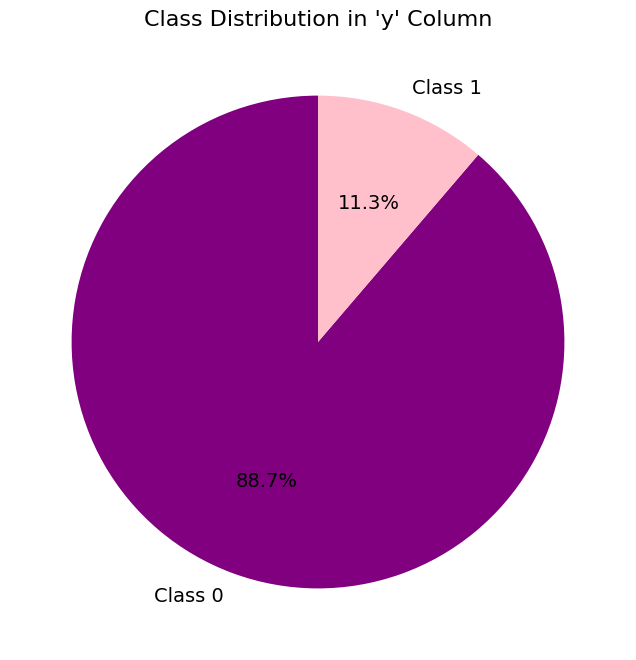

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
counts.plot.pie(
  labels=["Class 0", "Class 1"],
  autopct="%1.1f%%",
  startangle=90,
  colors=["purple", "pink"],
  textprops={"fontsize": 14}
)
plt.title("Class Distribution in 'y' Column", fontsize=16)
plt.ylabel("")
plt.show()